# PCA on the dataset

In [2]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt


### Importing the dataset

In [42]:
df_main = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_main.csv', index_col=0)
df_main.groupby('Surge').count()

,rgiid,x,y,Slope,Name,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline
Surge,,,,,,,,,,,,
0,104245,104245,104245,104245,60242,99044,99044,99044,104079,104079,104079,104097
1,10953,10953,10953,10953,10876,10612,10612,10612,10953,10953,10953,10953
2,4361,4361,4361,4361,4361,4249,4249,4249,4361,4361,4361,4361
3,11431,11431,11431,11431,11350,11082,11082,11082,11421,11421,11421,11429
9,3815,3815,3815,3815,3815,0,0,0,0,0,0,3795


In [43]:
df_main.drop(df_main[df_main['Surge']==9].index, inplace = True)
df_main.drop(df_main[df_main['Surge']==1].index, inplace = True)
df_main.drop(df_main[df_main['Surge']==2].index, inplace = True)
df_main.groupby('Surge').count()

,rgiid,x,y,Slope,Name,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline
Surge,,,,,,,,,,,,
0,104245,104245,104245,104245,60242,99044,99044,99044,104079,104079,104079,104097
3,11431,11431,11431,11431,11350,11082,11082,11082,11421,11421,11421,11429


In [44]:
corr = df_main.corr()
corr

,x,y,Surge,Slope,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline
x,1.000000,-0.149144,0.135795,-0.474290,-0.249954,0.376819,-0.139235,-0.382967,-0.270208,-0.270208,0.324672
y,-0.149144,1.000000,-0.138088,0.015916,0.067223,0.182079,0.135797,0.101428,-0.334081,-0.334081,0.170020
Surge,0.135795,-0.138088,1.000000,-0.299665,-0.198208,0.287949,-0.114179,-0.097796,-0.027109,-0.027109,0.232376
Slope,-0.474290,0.015916,-0.299665,1.000000,0.353604,-0.533973,0.196661,0.211976,0.217967,0.217967,-0.345796
bed,-0.249954,0.067223,-0.198208,0.353604,1.000000,-0.383121,0.947236,0.524953,-0.197396,-0.197396,-0.219306
thickness,0.376819,0.182079,0.287949,-0.533973,-0.383121,1.000000,-0.066827,-0.332237,-0.235967,-0.235967,0.538322
surface_elevation,-0.139235,0.135797,-0.114179,0.196661,0.947236,-0.066827,1.000000,0.451881,-0.295287,-0.295287,-0.050098
ELA,-0.382967,0.101428,-0.097796,0.211976,0.524953,-0.332237,0.451881,1.000000,-0.205150,-0.205150,-0.235459
beta,-0.270208,-0.334081,-0.027109,0.217967,-0.197396,-0.235967,-0.295287,-0.205150,1.000000,1.000000,-0.211345
cmb,-0.270208,-0.334081,-0.027109,0.217967,-0.197396,-0.235967,-0.295287,-0.205150,1.000000,1.000000,-0.211345


In [45]:
df_main.groupby('Surge').count()

,rgiid,x,y,Slope,Name,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline
Surge,,,,,,,,,,,,
0,104245,104245,104245,104245,60242,99044,99044,99044,104079,104079,104079,104097
3,11431,11431,11431,11431,11350,11082,11082,11082,11421,11421,11421,11429


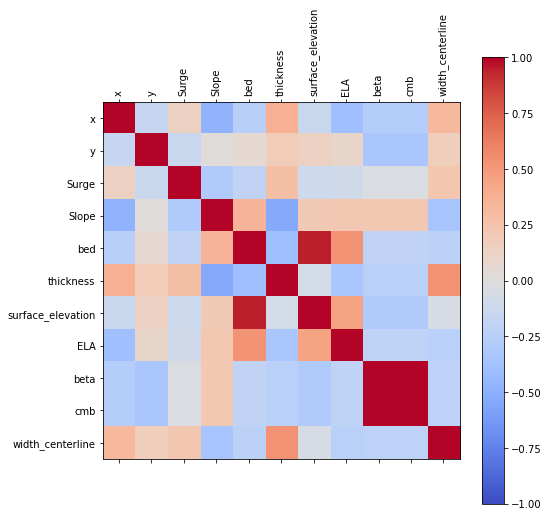

In [46]:
plt.figure(figsize = (8, 8))
plt.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar()

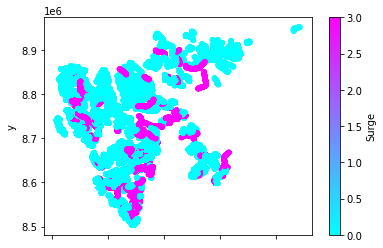

In [143]:
df_main[df_main.Surge.isin([0, 3])].plot.scatter(x='x', y='y', c='Surge', cmap='cool')

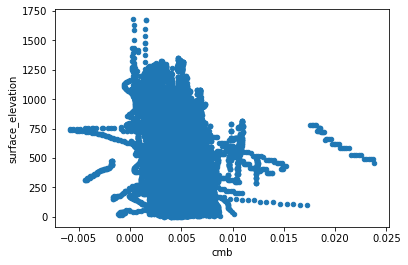

In [29]:
df_main.plot.scatter(x='cmb', y='surface_elevation')

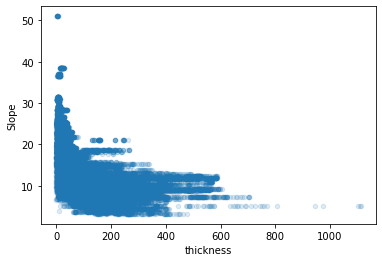

In [30]:
df_main.plot.scatter(x='thickness', y='Slope', alpha=0.15)

In [31]:
features = ['Slope', 'bed', 'thickness',
       'surface_elevation', 'ELA', 'beta', 'cmb', 'width_centerline']

# features = [df_main['Slope'], df_main['bed'], df_main['thickness'],
#        df_main['surface_elevation'], df_main['ELA'], df_main['beta'], df_main['cmb'], df_main['width_centerline']]
# # Separating out the features
# x = df.loc[:, features].values
# # Separating out the target
# y = df.loc[:,['target']].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

### Separating out the features

In [32]:
x = df_main.loc[:, features].values

In [33]:
# Separating out the target
y = df_main.loc[:,['Surge']].values

### Standardizing the features

In [34]:
x = StandardScaler().fit_transform(x)
# x = x[~np.isnan(x)]

In [35]:
df_main_standard = pd.DataFrame(x)
df_main_standard.columns = ['Slope', 'bed', 'thickness', 'surface_elevation', 'ELA', 'beta', 'cmb', 'width_centerline']
df_main_standard.dropna(how='any', inplace=True)
df_main_standard
# df_main_standard

,Slope,bed,thickness,surface_elevation,ELA,beta,cmb,width_centerline
0,0.529943,0.070233,-0.770698,-0.191579,-0.729527,-0.222033,-0.222033,-0.436740
1,0.529943,0.070233,-0.770698,-0.191579,-0.729527,-0.220869,-0.220869,-0.448435
2,0.529943,0.070233,-0.770698,-0.191579,-0.729527,-0.219705,-0.219705,-0.444545
3,0.529943,0.070233,-0.770698,-0.191579,-0.729527,-0.218540,-0.218540,-0.440655
4,0.529943,0.070233,-0.770698,-0.191579,-0.729527,-0.217376,-0.217376,-0.427905
...,...,...,...,...,...,...,...,...
115670,-0.499366,-0.586808,-0.195035,-0.701540,0.572635,-0.010490,-0.010490,-0.371204
115671,-0.499366,-0.605105,-0.240668,-0.737141,0.572635,-0.009340,-0.009340,-0.378635
115672,-0.499366,-0.605105,-0.240668,-0.737141,0.572635,-0.006210,-0.006210,-0.384866
115673,-0.499366,-0.604641,-0.235156,-0.734726,0.572635,-0.005186,-0.005186,-0.389003


In [79]:
np.any(np.isnan(df_main_standard))

False

In [73]:
np.all(np.isinf(df_main_standard))

False

In [76]:
x

array([[ 0.57040642,  0.1030487 , -0.78739149, ..., -0.24456751,
        -0.24456751, -0.45786748],
       [ 0.57040642,  0.1030487 , -0.78739149, ..., -0.24337557,
        -0.24337557, -0.46965694],
       [ 0.57040642,  0.1030487 , -0.78739149, ..., -0.24218364,
        -0.24218364, -0.46573577],
       ...,
       [-0.77086233,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.77086233,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.77086233,         nan,         nan, ...,         nan,
                nan,         nan]])

### PCA Projection to 2D

In [47]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(df_main_standard)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])


In [48]:
finalDf = pd.concat([principalDf, df_main[['Surge']]], axis = 1)
finalDf.groupby('Surge').count()
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Surge
0,-0.213209,0.464964,-0.618684,0.824857,-0.555968,0.365224,2.571293e-10,-2.099102e-16,0.0
1,-0.215588,0.470256,-0.622897,0.820894,-0.563270,0.360860,2.565105e-10,-2.021731e-14,0.0
2,-0.214306,0.470179,-0.620325,0.821648,-0.560618,0.362265,2.566046e-10,-2.347518e-16,0.0
3,-0.213024,0.470101,-0.617753,0.822402,-0.557966,0.363670,2.568460e-10,-2.077828e-16,0.0
4,-0.209661,0.466972,-0.611323,0.825839,-0.549655,0.368354,2.575885e-10,-5.328809e-15,0.0
...,...,...,...,...,...,...,...,...,...
130985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
130988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


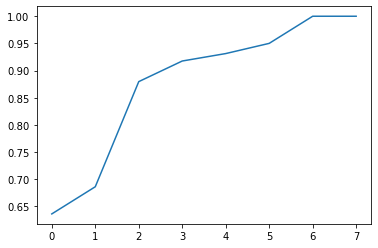

In [49]:
plt.plot(1-pca.explained_variance_ratio_)

/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDe

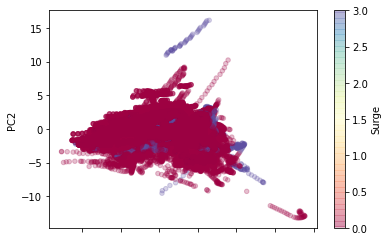

In [50]:
finalDf.plot.scatter(x='PC1', y='PC2', c='Surge', cmap='Spectral', alpha=0.25)

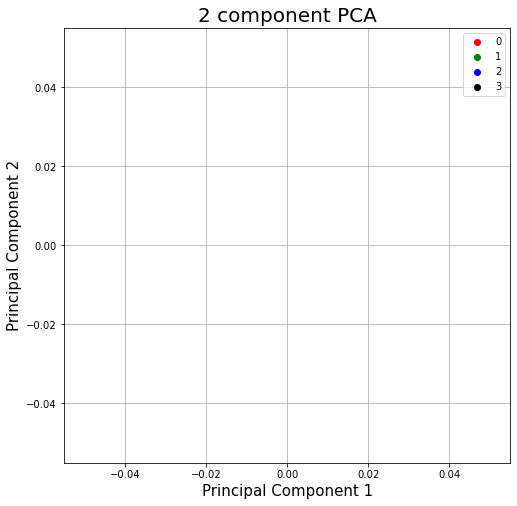

In [123]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
surges = ['0', '1', '2', '3']
colors = ['r', 'g', 'b', 'k']
for surge, color in zip(surges,colors):
    indicesToKeep = finalDf['Surge'] == surge
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
#                , s = 50)
ax.legend(surges)
ax.grid()
